# Bayes Decision Rule
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the calculation of **likelihood** of each features given particular class 
- implement the calculation of **posterior** of each class given particular feature
- implement the calculation of **minimal total risk** of bayes decision rule

In [2]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [9]:
data = sio.loadmat('data.mat')
x1_train, x1_test, x2_train, x2_test = data['x1_train'], data['x1_test'], data['x2_train'], data['x2_test']
print(x1_train.shape, x1_test.shape, x2_train.shape, x2_test.shape)
all_x = np.concatenate([x1_train, x1_test, x2_train, x2_test], 1)
print(all_x.shape)
data_range = [np.min(all_x), np.max(all_x)]
print(x2_test[:1])

(1, 400) (1, 100) (1, 800) (1, 200)
(1, 1500)
[[-1  1  5  3  5  7  1  1  5  3  4  1  1  5  8  2  7  8  7  8  5 -1  1  3
  -1  2  7  1  4  4  9  3  5  0  1  4  5  2  4  1  5  1  4  5  8  0  4 -2
   4  6  0  3  7  8  4  8  3  1  3 -2  1  2  8  4 10  5  5  3  1  4  2 -1
   5  3  4  2  6  2  5  6  3  1  4  7 -3  4  4  5  2  5  2  4  7  3  0  3
   5  3  8  2  2  8  4  5  8  2  3  6  1  4  0  5 10  3  2  8  1  2  3  5
   0  1  4  3 -2 -2 -2  4  5  6  0 -3  5  3  3  2  3  9  3  5 -3 -1  1  4
   5 11 -2 -2  3  1  0  6  2  5  4 -1  6  3  2  3  5  7  4 -2  6  2  9  5
   5  2  1  1  0  1  7  2  3  8  2  3  6  4  5  2  3  8 10  3  1  3  2  1
  -2 -1  3  2  7 -2  1  5]]


In [10]:
from get_x_distribution import get_x_distribution

train_x = get_x_distribution(x1_train, x2_train, data_range)
test_x = get_x_distribution(x1_test, x2_test, data_range)
print(train_x.shape, test_x.shape)

(2, 19) (2, 19)


## Part 1 likelihood
Your code for this section will be written inside **bayes_decision_rule/likehood.py**. 

[[0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.0025  0.02    0.155   0.3325  0.32    0.1525  0.015   0.0025  0.
  0.     ]
 [0.00125 0.00375 0.00375 0.01125 0.01625 0.05625 0.07125 0.08875 0.1225
  0.1225  0.12375 0.13    0.09625 0.0675  0.0375  0.02125 0.0175  0.005
  0.00375]]


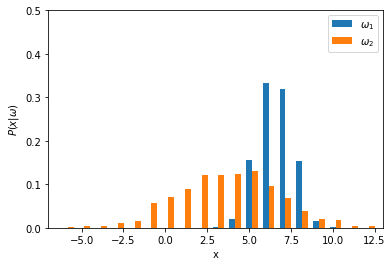

In [6]:
from likelihood import likelihood

l = likelihood(train_x)
print(l)
width = 0.35
p1 = plt.bar(np.arange(data_range[0], data_range[1] + 1), l.T[:,0], width)
p2 = plt.bar(np.arange(data_range[0], data_range[1] + 1) + width, l.T[:,1], width)
plt.xlabel('x')
plt.ylabel('$P(x|\omega)$')
plt.legend((p1[0], p2[0]), ('$\omega_1$', '$\omega_2$'))
plt.axis([data_range[0] - 1, data_range[1] + 1, 0, 0.5])
plt.show()

In [11]:
#TODO
#compute the number of all the misclassified x using maximum likelihood decision rule

# begin answer
mld = np.zeros(train_x.shape)
print(np.argmax(l, axis=0))
mld[0, l[0] > l[1]] = 1
mld[1, l[0] < l[1]] = 1
print(mld)

# end answer


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1.]]


## Part 2 posterior
Your code for this section will be written inside **bayes_decision_rule/posterior.py**. 

In [ ]:
from posterior import posterior

p = posterior(train_x)
width = 0.35
p1 = plt.bar(np.arange(data_range[0], data_range[1] + 1), p.T[:,0], width)
p2 = plt.bar(np.arange(data_range[0], data_range[1] + 1) + width, p.T[:,1], width)
plt.xlabel('x')
plt.ylabel('$P(\omega|x)$')
plt.legend((p1[0], p2[0]), ('$\omega_1$', '$\omega_2$'))
plt.axis([data_range[0] - 1, data_range[1] + 1, 0, 1.2])
plt.show()

In [ ]:
#TODO
#compute the number of all the misclassified x using optimal bayes decision rule

# begin answer
# end answer


## Part 3 risk


In [ ]:
risk = np.array([[0, 1], [2, 0]])
#TODO
#get the minimal risk using optimal bayes decision rule and risk weights

# begin answer
# end answer